<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Exploratory_Data_Analysis_(EDA)_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# **1.Medical Cost Personal Datasets**

**The data.head() function in pandas returns the first few rows of a DataFrame. By default, it displays the first 5 rows, but you can specify a different number.**

In [ ]:
data = pd.read_csv("/insurance.csv",index_col=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
1,19,female,27.900,0,yes,southwest,16884.92400
2,18,male,33.770,1,no,southeast,1725.55230
3,28,male,33.000,3,no,southeast,4449.46200
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.880,0,no,northwest,3866.85520


**The data.tail() function in pandas returns the last few rows of a DataFrame. By default, it shows the last 5 rows, but you can specify a different number.**

In [ ]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
46,1000.23,124153.04,1903.93,New York,64926.08
47,1315.46,115816.21,297114.46,Florida,49490.75
48,0.00,135426.92,0.00,California,42559.73
49,542.05,51743.15,0.00,New York,35673.41
50,0.00,116983.80,45173.06,California,14681.40


**The data.shape attribute in pandas returns the number of rows and columns in a DataFrame as a tuple (rows, columns). It helps quickly understand the dataset's size.**

In [ ]:
data.shape

(1338, 7)

**The data.dtypes attribute in pandas returns the data types of each column in a DataFrame. It helps in understanding the structure of the dataset and determining whether any data type conversions are needed.**

In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


**The .info() function in EDA provides a summary of a DataFrame, including the number of rows, column names, non-null counts, data types, and memory usage, helping to identify missing values and understand the dataset structure.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**data[data.duplicated()] is a Pandas operation used to filter out duplicate rows from a DataFrame.**

In [ ]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
582,19,male,30.59,0,no,northwest,1639.5631


**data_cleaned1 = data.drop_duplicates() is a Pandas operation used to remove duplicate rows from a DataFrame**

In [ ]:
data_cleaned1=data.drop_duplicates()

In [ ]:
data_cleaned1.shape

(1337, 7)

In [ ]:
data.shape

(1338, 7)

In [ ]:
data_cleaned1.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**set_printoptions() is used to control how NumPy arrays are displayed, such as setting precision, suppressing scientific notation, or formatting numbers.**

**MinMaxScaler is used for feature scaling, transforming values to a given range (default: 0 to 1).**

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

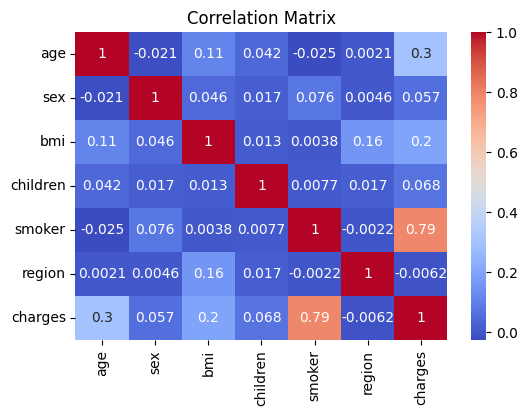

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

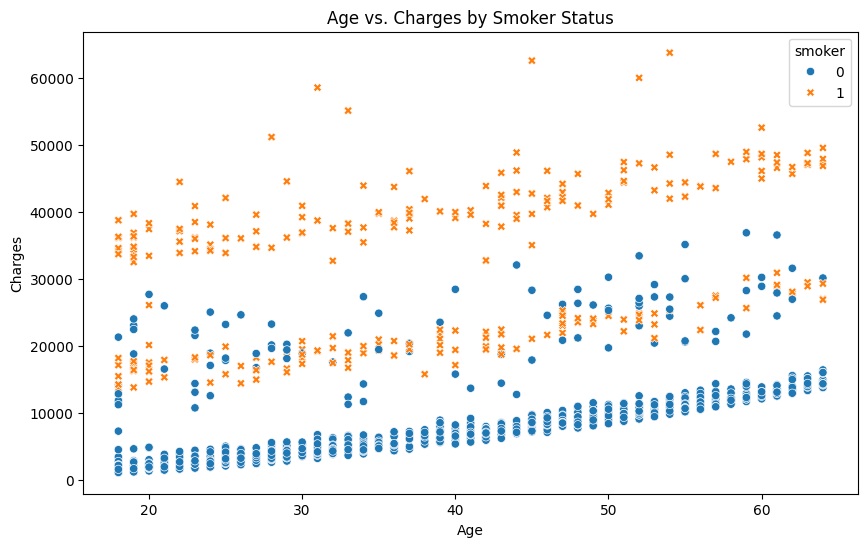

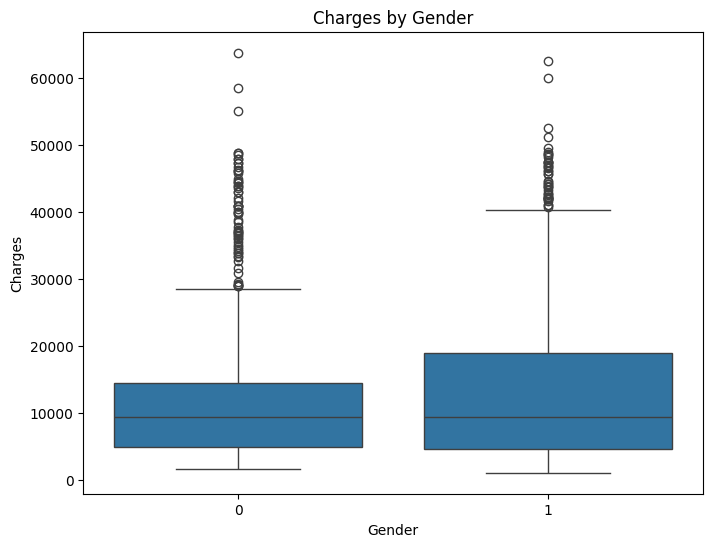

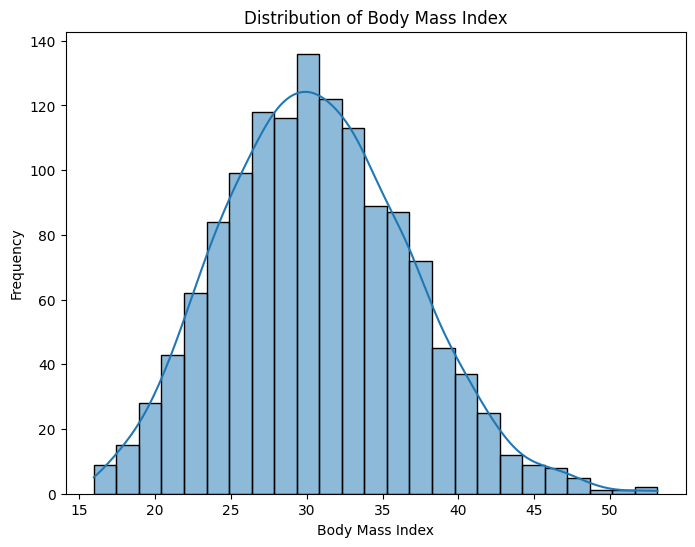

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', style='smoker')
plt.title('Age vs. Charges by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='charges')
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], kde=True)
plt.title('Distribution of Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()

# **2.Startup Dataset**

**The data.head() function in pandas returns the first few rows of a DataFrame. By default, it displays the first 5 rows, but you can specify a different number.**

In [ ]:
data = pd.read_csv("/content/50_Startups.csv",index_col=0)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
1,165349.20,136897.80,471784.10,New York,192261.83
2,162597.70,151377.59,443898.53,California,191792.06
3,153441.51,101145.55,407934.54,Florida,191050.39
4,144372.41,118671.85,383199.62,New York,182901.99
5,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
46,1000.23,124153.04,1903.93,New York,64926.08
47,1315.46,115816.21,297114.46,Florida,49490.75
48,0.00,135426.92,0.00,California,42559.73
49,542.05,51743.15,0.00,New York,35673.41
50,0.00,116983.80,45173.06,California,14681.40


In [ ]:
data.shape

(50, 5)

In [ ]:
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [ ]:
data[['R&D Spend']]

,R&D Spend
1,165349.20
2,162597.70
3,153441.51
4,144372.41
5,142107.34
6,131876.90
7,134615.46
8,130298.13
9,120542.52
10,123334.88


In [ ]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
data[data.duplicated()].shape

(0, 5)

**The line data_cleaned2 = data_cleaned1.drop('R&D Spend', axis=1) is used to remove a specific column ('R&D Spend) from the DataFrame.**

In [ ]:
data_cleaned = data.drop('R&D Spend', axis=1)

In [ ]:
data_cleaned

,Administration,Marketing Spend,State,Profit
1,136897.80,471784.10,New York,192261.83
2,151377.59,443898.53,California,191792.06
3,101145.55,407934.54,Florida,191050.39
4,118671.85,383199.62,New York,182901.99
5,91391.77,366168.42,Florida,166187.94
6,99814.71,362861.36,New York,156991.12
7,147198.87,127716.82,California,156122.51
8,145530.06,323876.68,Florida,155752.60
9,148718.95,311613.29,New York,152211.77
10,108679.17,304981.62,California,149759.96


In [ ]:
data_cleaned1 = data_cleaned.rename({'State': 'city'}, axis=1)

In [ ]:
data_cleaned1

,Administration,Marketing Spend,city,Profit
1,136897.80,471784.10,New York,192261.83
2,151377.59,443898.53,California,191792.06
3,101145.55,407934.54,Florida,191050.39
4,118671.85,383199.62,New York,182901.99
5,91391.77,366168.42,Florida,166187.94
6,99814.71,362861.36,New York,156991.12
7,147198.87,127716.82,California,156122.51
8,145530.06,323876.68,Florida,155752.60
9,148718.95,311613.29,New York,152211.77
10,108679.17,304981.62,California,149759.96


In [ ]:
data_cleaned1.isnull().sum()

,0
Administration,0
Marketing Spend,0
city,0
Profit,0


In [ ]:
data_cleaned1

,Administration,Marketing Spend,city,Profit
1,136897.80,471784.10,New York,192261.83
2,151377.59,443898.53,California,191792.06
3,101145.55,407934.54,Florida,191050.39
4,118671.85,383199.62,New York,182901.99
5,91391.77,366168.42,Florida,166187.94
6,99814.71,362861.36,New York,156991.12
7,147198.87,127716.82,California,156122.51
8,145530.06,323876.68,Florida,155752.60
9,148718.95,311613.29,New York,152211.77
10,108679.17,304981.62,California,149759.96


In [ ]:
# Get the object-type columns from the DataFrame.
obj_columns = data_cleaned1.select_dtypes(include=['object']).columns

# Now you can get the shape.
obj_columns.shape

# Now you can get the object columns.
obj_columns

Index(['city'], dtype='object')

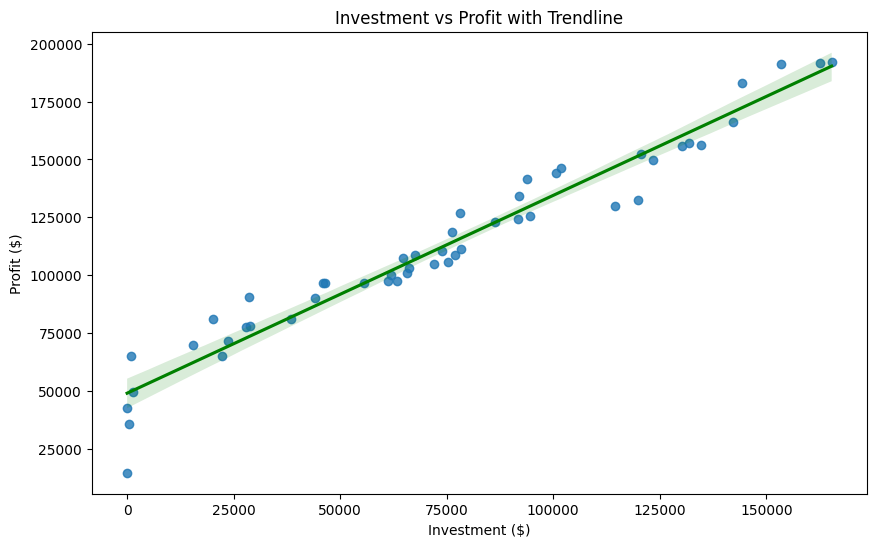

In [ ]:
plt.figure(figsize=(10,6))
# Assuming the column is named 'R&D Spend' instead of 'investment'
sns.regplot(data=data, x='R&D Spend', y='Profit', line_kws={'color':'green'})
plt.title('Investment vs Profit with Trendline')
plt.xlabel('Investment ($)')
plt.ylabel('Profit ($)')
plt.show()

**Linear Regression** is a supervised machine learning algorithm used to predict a continuous numerical value based on input features. It finds the best-fitting straight line that models the relationship between variables.

**1. Actual Value (y_actual) →** The real/true output from the dataset.

 a. The Actual Values are from the dataset.

**2. Predicted Value (y_pred) →** The output predicted by the model.

 b. The Predicted Values are calculated using the best-fit line.

Slope (Coefficient): 0.85
Intercept: 49032.90


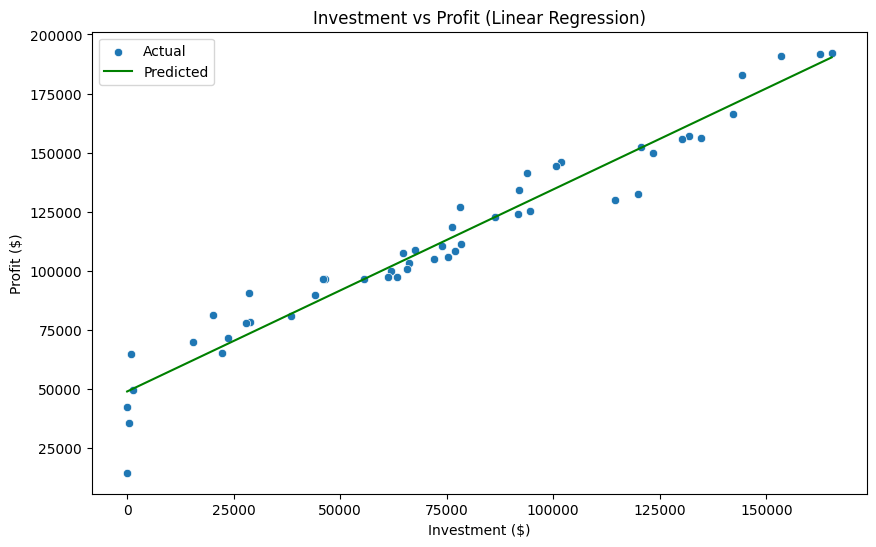

In [ ]:
X = data[['R&D Spend']] # Changed 'investment' to 'R&D Spend'
y = data['Profit']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print slope and intercept
print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict values
data['predicted_profit'] = model.predict(X)

# Plot actual vs predicted profits
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='R&D Spend', y='Profit', label='Actual') # Changed 'investment' to 'R&D Spend'
sns.lineplot(data=data, x='R&D Spend', y='predicted_profit', color='green', label='Predicted') # Changed 'investment' to 'R&D Spend'
plt.title('Investment vs Profit (Linear Regression)')
plt.xlabel('Investment ($)')
plt.ylabel('Profit ($)')
plt.legend()
plt.show()

# **3.Concrete Strength Dataset**

In [ ]:
data = pd.read_csv('/content/concrete_data.csv')
data.head()

,Unnamed: 0,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.tail()

,Unnamed: 0,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,1026,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,1027,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,1028,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,1029,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,1030,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
data.shape

(1030, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1030 non-null   int64  
 1   cement                         1030 non-null   float64
 2   blast_furnace_slag             1030 non-null   float64
 3   fly_ash                        1030 non-null   float64
 4   water                          1030 non-null   float64
 5   superplasticizer               1030 non-null   float64
 6   coarse_aggregate               1030 non-null   float64
 7   fine_aggregate                 1030 non-null   float64
 8   age                            1030 non-null   int64  
 9   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Unnamed: 0                       0
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [ ]:
data.describe()

,Unnamed: 0,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000



Summary Statistics:
         Unnamed: 0       cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000  1030.000000         1030.000000  1030.000000  1030.000000   
mean    515.500000   281.167864           73.895825    54.188350   181.567282   
std     297.479691   104.506364           86.279342    63.997004    21.354219   
min       1.000000   102.000000            0.000000     0.000000   121.800000   
25%     258.250000   192.375000            0.000000     0.000000   164.900000   
50%     515.500000   272.900000           22.000000     0.000000   185.000000   
75%     772.750000   350.000000          142.950000   118.300000   192.000000   
max    1030.000000   540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841

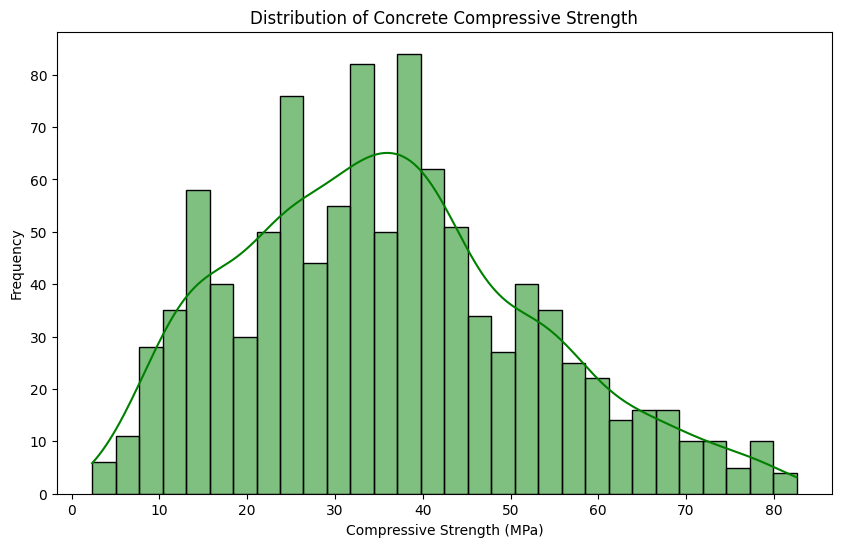

In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", data.describe())

# Histogram: Distribution of Concrete Compressive Strength
plt.figure(figsize=(10, 6))
sns.histplot(data['concrete_compressive_strength'], bins=30, kde=True, color="green")
plt.xlabel("Compressive Strength (MPa)")
plt.ylabel("Frequency")
plt.title("Distribution of Concrete Compressive Strength")
plt.show()

In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=['concrete_compressive_strength'])  # Drop target column, changed 'strength' to 'concrete_compressive_strength'
y = data['concrete_compressive_strength']  # Changed 'strength' to 'concrete_compressive_strength'

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 7.75
Mean Squared Error (MSE): 97.03
R² Score: 0.62


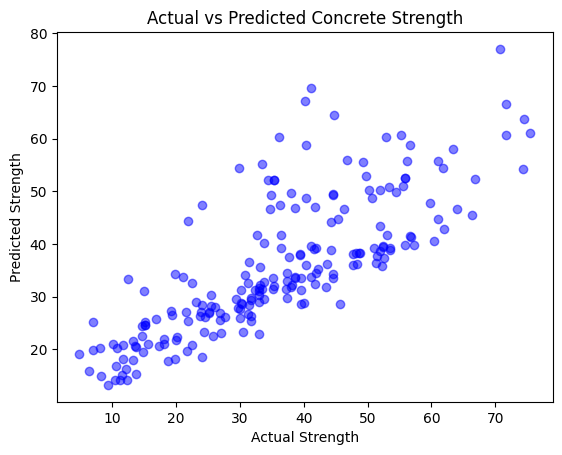

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.show()


# **4.House Price Prediction Dataset**

**Objective: Analyze house price determinants such as size, location, and amenities.**

In [ ]:
import pandas as pd # Import the pandas library and assign it the alias 'pd'

data = pd.read_csv('/content/Housing.csv')
data.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.tail()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,541,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,542,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,543,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,544,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,545,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
data.shape

(545, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        545 non-null    int64 
 1   price             545 non-null    int64 
 2   area              545 non-null    int64 
 3   bedrooms          545 non-null    int64 
 4   bathrooms         545 non-null    int64 
 5   stories           545 non-null    int64 
 6   mainroad          545 non-null    object
 7   guestroom         545 non-null    object
 8   basement          545 non-null    object
 9   hotwaterheating   545 non-null    object
 10  airconditioning   545 non-null    object
 11  parking           545 non-null    int64 
 12  prefarea          545 non-null    object
 13  furnishingstatus  545 non-null    object
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Unnamed: 0          0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
data[data.duplicated()].shape

(0, 14)

In [ ]:
data.describe()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,273.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,545.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


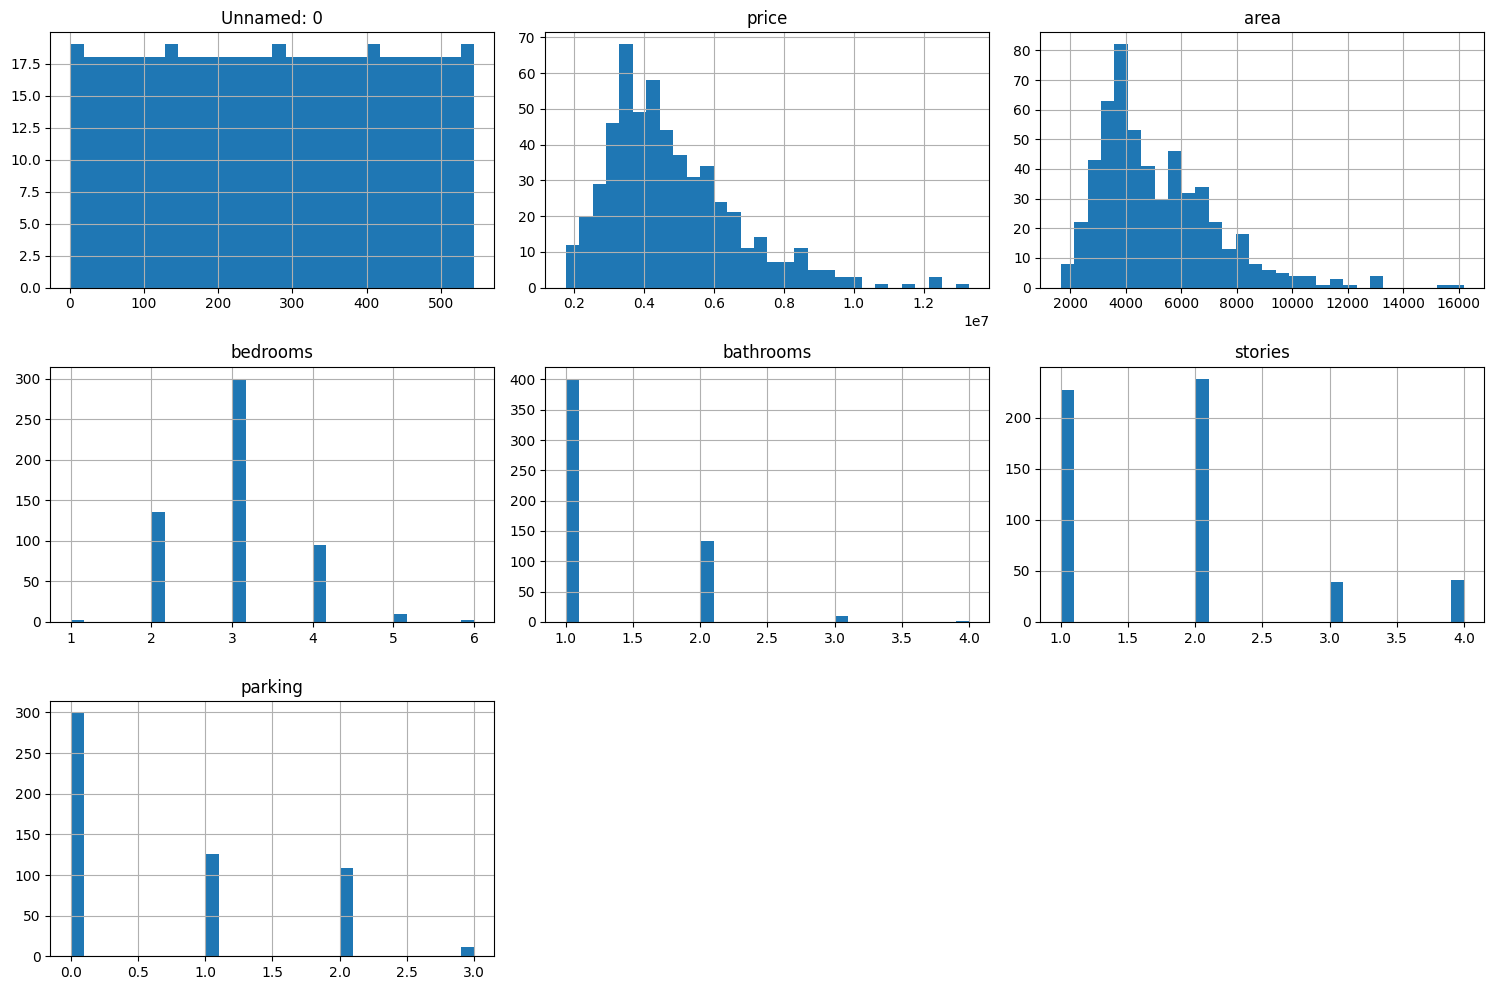

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

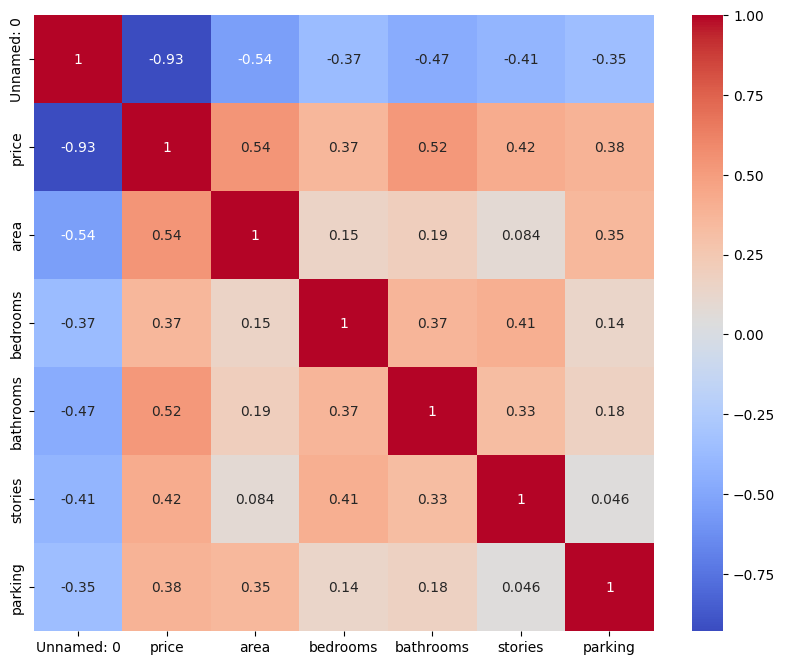

In [ ]:
plt.figure(figsize=(10, 8))
# Include only float, int, or boolean data
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# **5.Car Price Prediction Dataset**

**Objective: Examine car pricing factors such as brand, mileage, and year of manufacture**

In [ ]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')
data.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.tail()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   CarName           205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [ ]:
data.shape

(205, 27)

In [ ]:
# Extract brand names from 'CarName' column (assuming 'brand model' format)
data['Brand'] = data['CarName'].str.split().str[0].str.lower()
# Get unique brands
unique_brands = data['Brand'].unique()
print("Unique car brands:", unique_brands)


Unique car brands: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
unique_colors = data['CarName'].unique()
print(unique_colors)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [ ]:
brand_corrections = {
    'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}

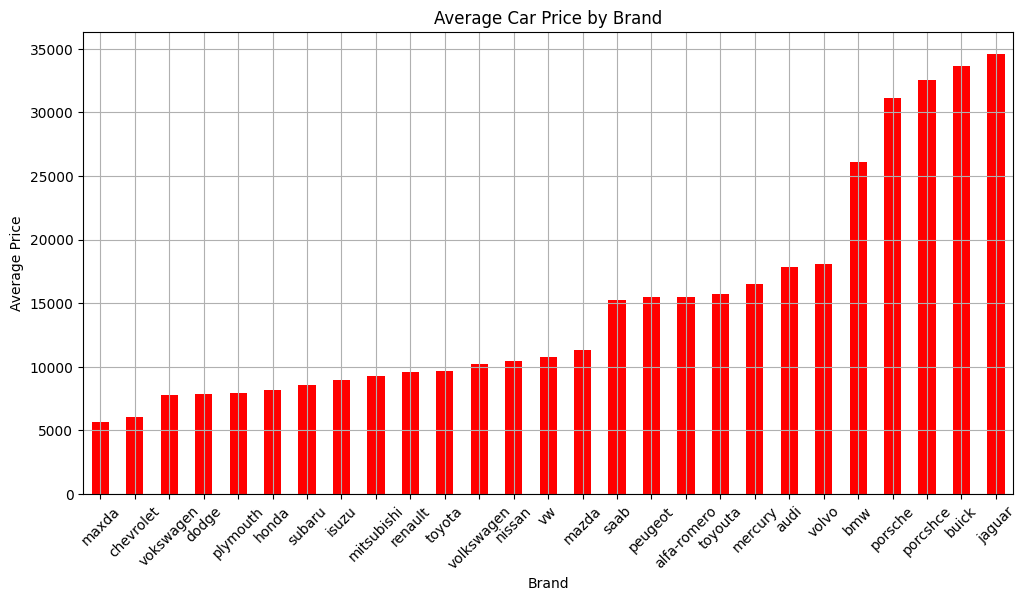

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'

plt.figure(figsize=(12, 6))
data.groupby('Brand')['price'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Average Car Price by Brand')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **6.Student Performance Dataset**

**Objective: Identify key factors influencing student academic performance**

In [21]:
import pandas as pd

data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [23]:
data.shape

(1000, 8)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
data[data.duplicated()].shape

(0, 8)

In [26]:
data_cleaned.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [27]:
unique_gender = data['gender'].unique()
print(unique_gender)
unique_race = data['race/ethnicity'].unique()
print(unique_race)
unique_parental_edu = data['parental level of education'].unique()
print(unique_parental_edu)
unique_lunch = data['lunch'].unique()
print(unique_lunch)
unique_test_prep_course= data['test preparation course'].unique()
print(unique_test_prep_course)

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


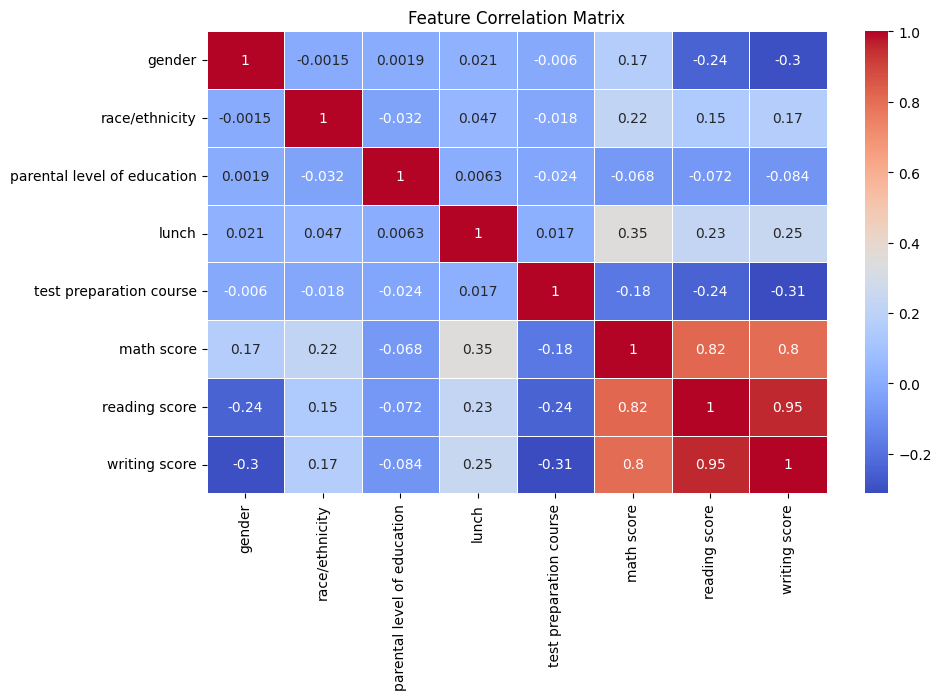

In [30]:
# Encode categorical variables
encoder = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    data[col] = encoder.fit_transform(data[col])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Feature Selection & Target Variable
X = data.drop(columns=['math score', 'reading score', 'writing score'])
y = data[['math score']]


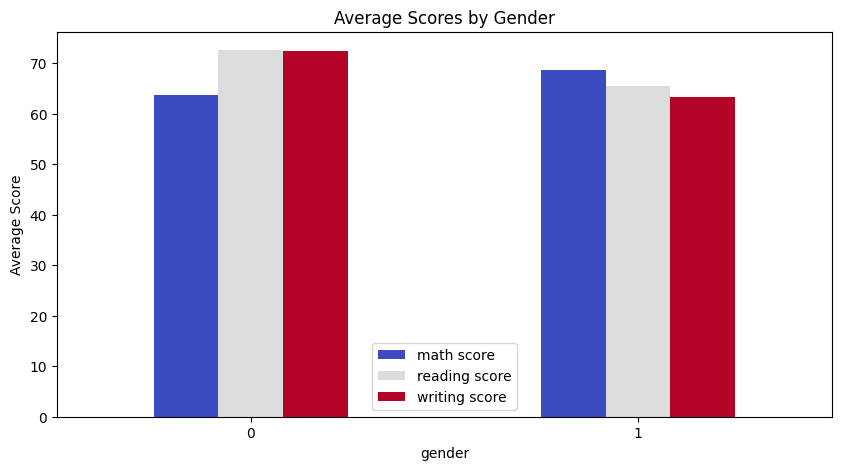

In [39]:
# Calculate average scores by gender
mean_scores_gender = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Plot average scores by gender
mean_scores_gender.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

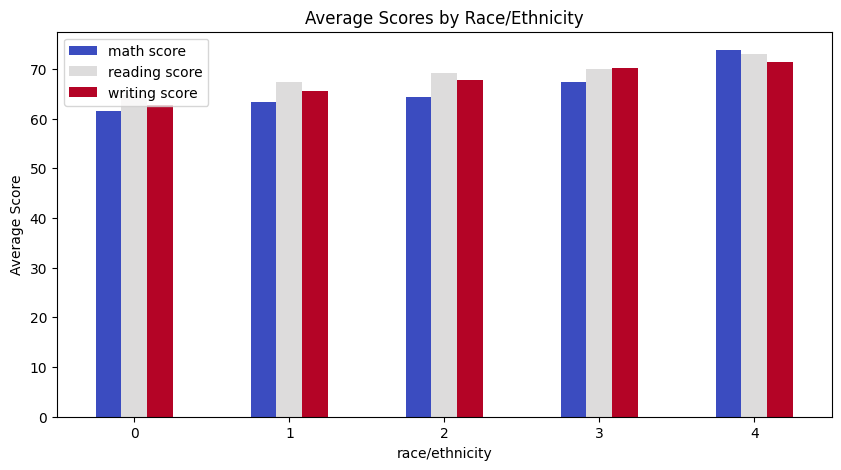

In [37]:
# Calculate average scores by race/ethnicity
mean_scores = data.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# Plot average scores
mean_scores.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Average Scores by Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()



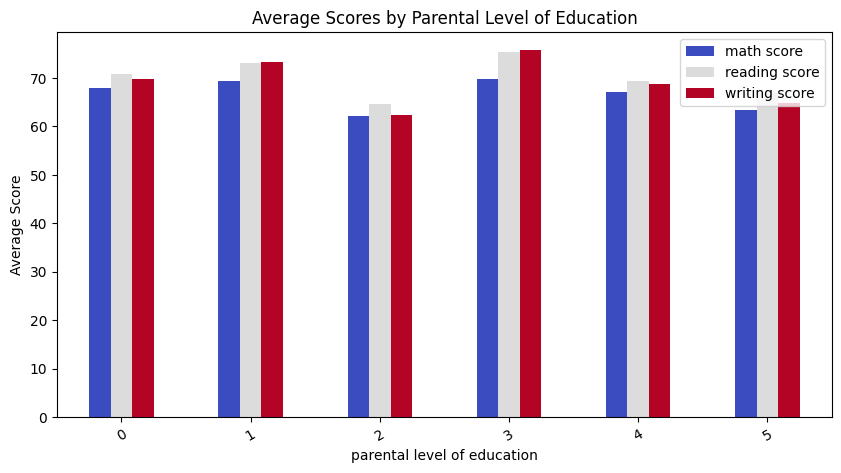

In [42]:
# Calculate average scores by parental level of education
mean_scores_education = data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
# Plot average scores by parental education level
mean_scores_education.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=30)
plt.show()

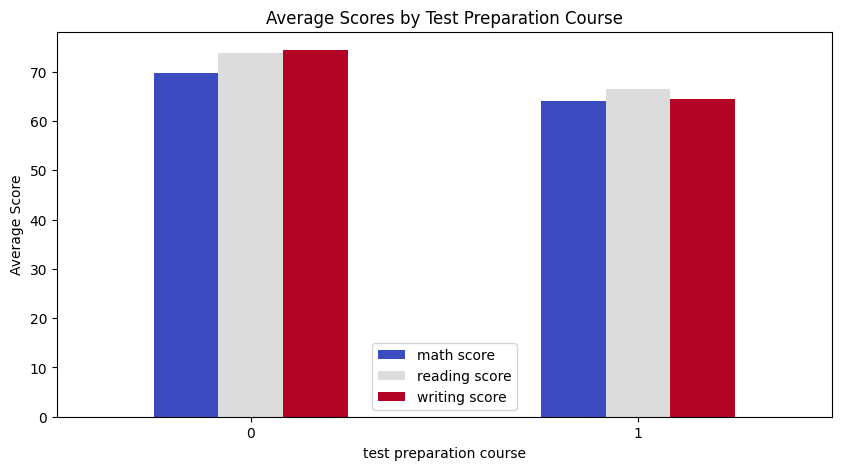

In [44]:
# Calculate average scores by test preparation course
mean_scores_prep = data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Plot average scores by test preparation course
mean_scores_prep.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Average Scores by Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()